In [1]:
# 📚 Basic Libraries
import pandas as pd
import numpy as np

# 📊 Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# 🤖 Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv("king_ country_ houses_aa.csv")
df = data.copy()

df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
# column standardization
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [4]:
# dealing with data types
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
# dealing with NaN values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
# dealing with duplicates
df.duplicated().sum()

0

In [7]:
# dealing with empty spaces
df.eq(" ").sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
# checking unique values
df.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [9]:
#df.chas.value_counts()

In [10]:
df['year'] = df['date'].str.slice(0, 4).astype(int)
df['month'] = df['date'].str.slice(4, 6).astype(int)
df['day'] = df['date'].str.slice(6, 8).astype(int)

In [11]:
df['sale_price'] = df['price']
df = df.drop('price', axis=1)

df = df.rename(columns={'sale_price': 'price'})

In [12]:
df = df.drop(['id', 'date'], axis=1)

In [13]:
#df = df.drop(columns = ['date'])

In [14]:
df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13,221900.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9,538000.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25,180000.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9,604000.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,5,21,360000.0
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,2,23,400000.0
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,6,23,402101.0
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,1,16,400000.0


#### One Hot Encoding for ZIP code

In [15]:
df = pd.get_dummies(df, columns=['zipcode'], prefix='zip')
df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,day,price,zip_98001,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10,13,221900.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12,9,538000.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2,25,180000.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12,9,604000.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2,18,510000.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,2014,5,21,360000.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

In [16]:
# checking outliers
df.corrwith(df["price"]).sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
                   ...   
zip_98002       -0.080300
zip_98168       -0.091665
zip_98001       -0.092179
zip_98042       -0.100370
zip_98023       -0.106093
Length: 91, dtype: float64

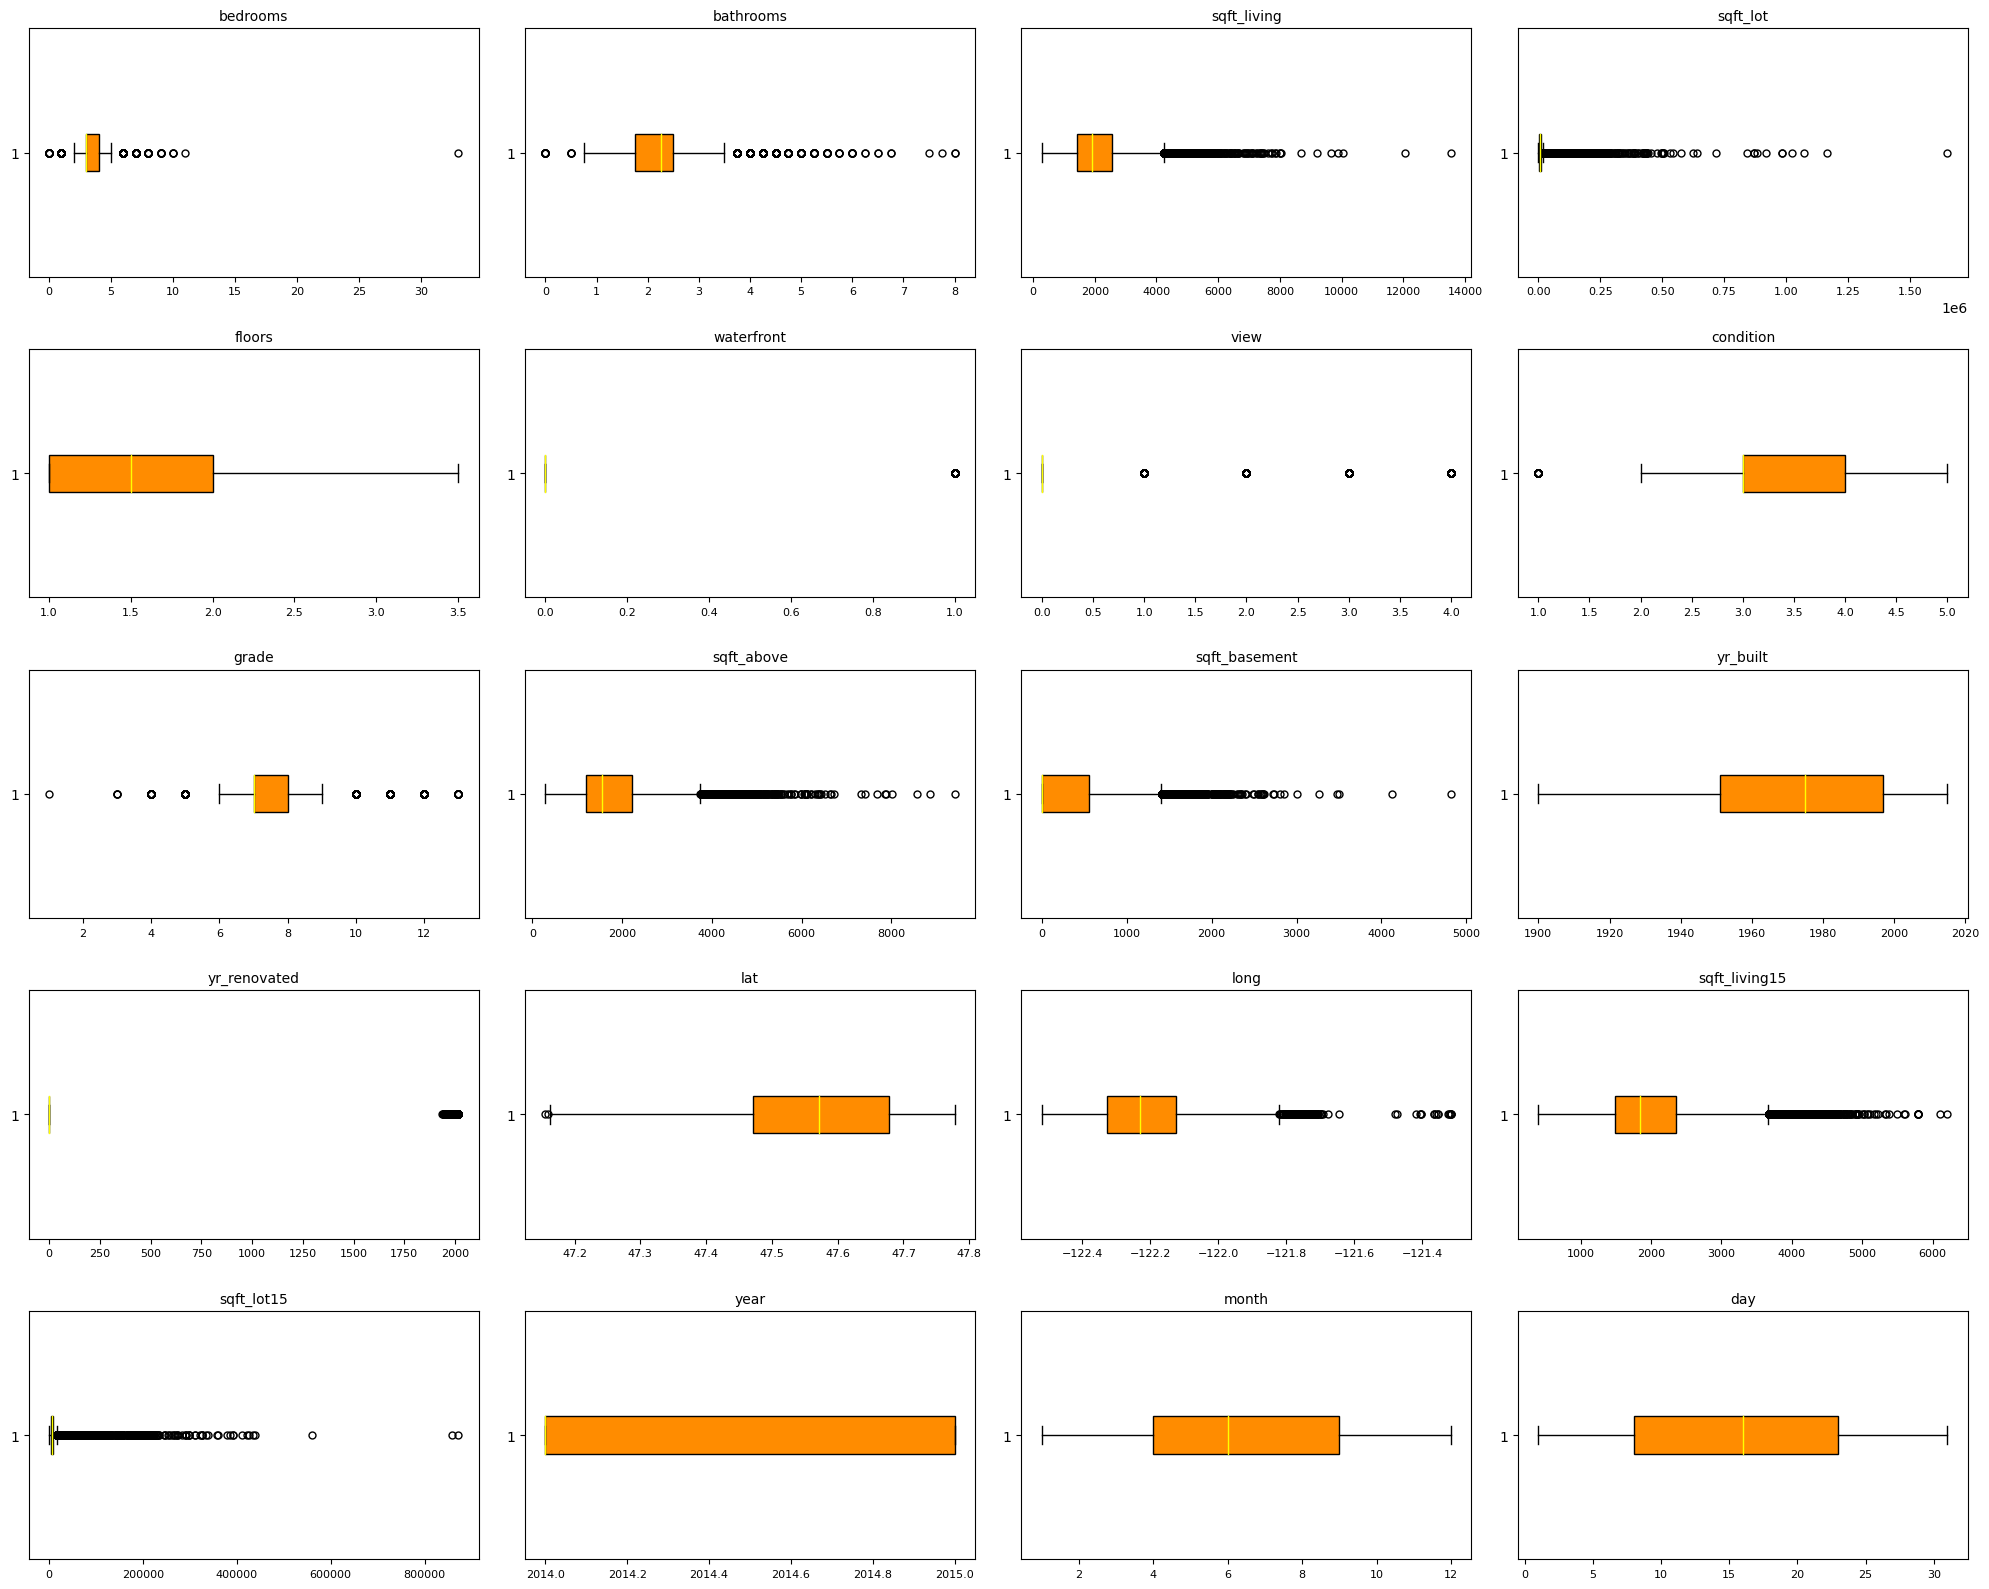

In [17]:
color = '#FF8C00'

# grid size
nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(df.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(df.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(df.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

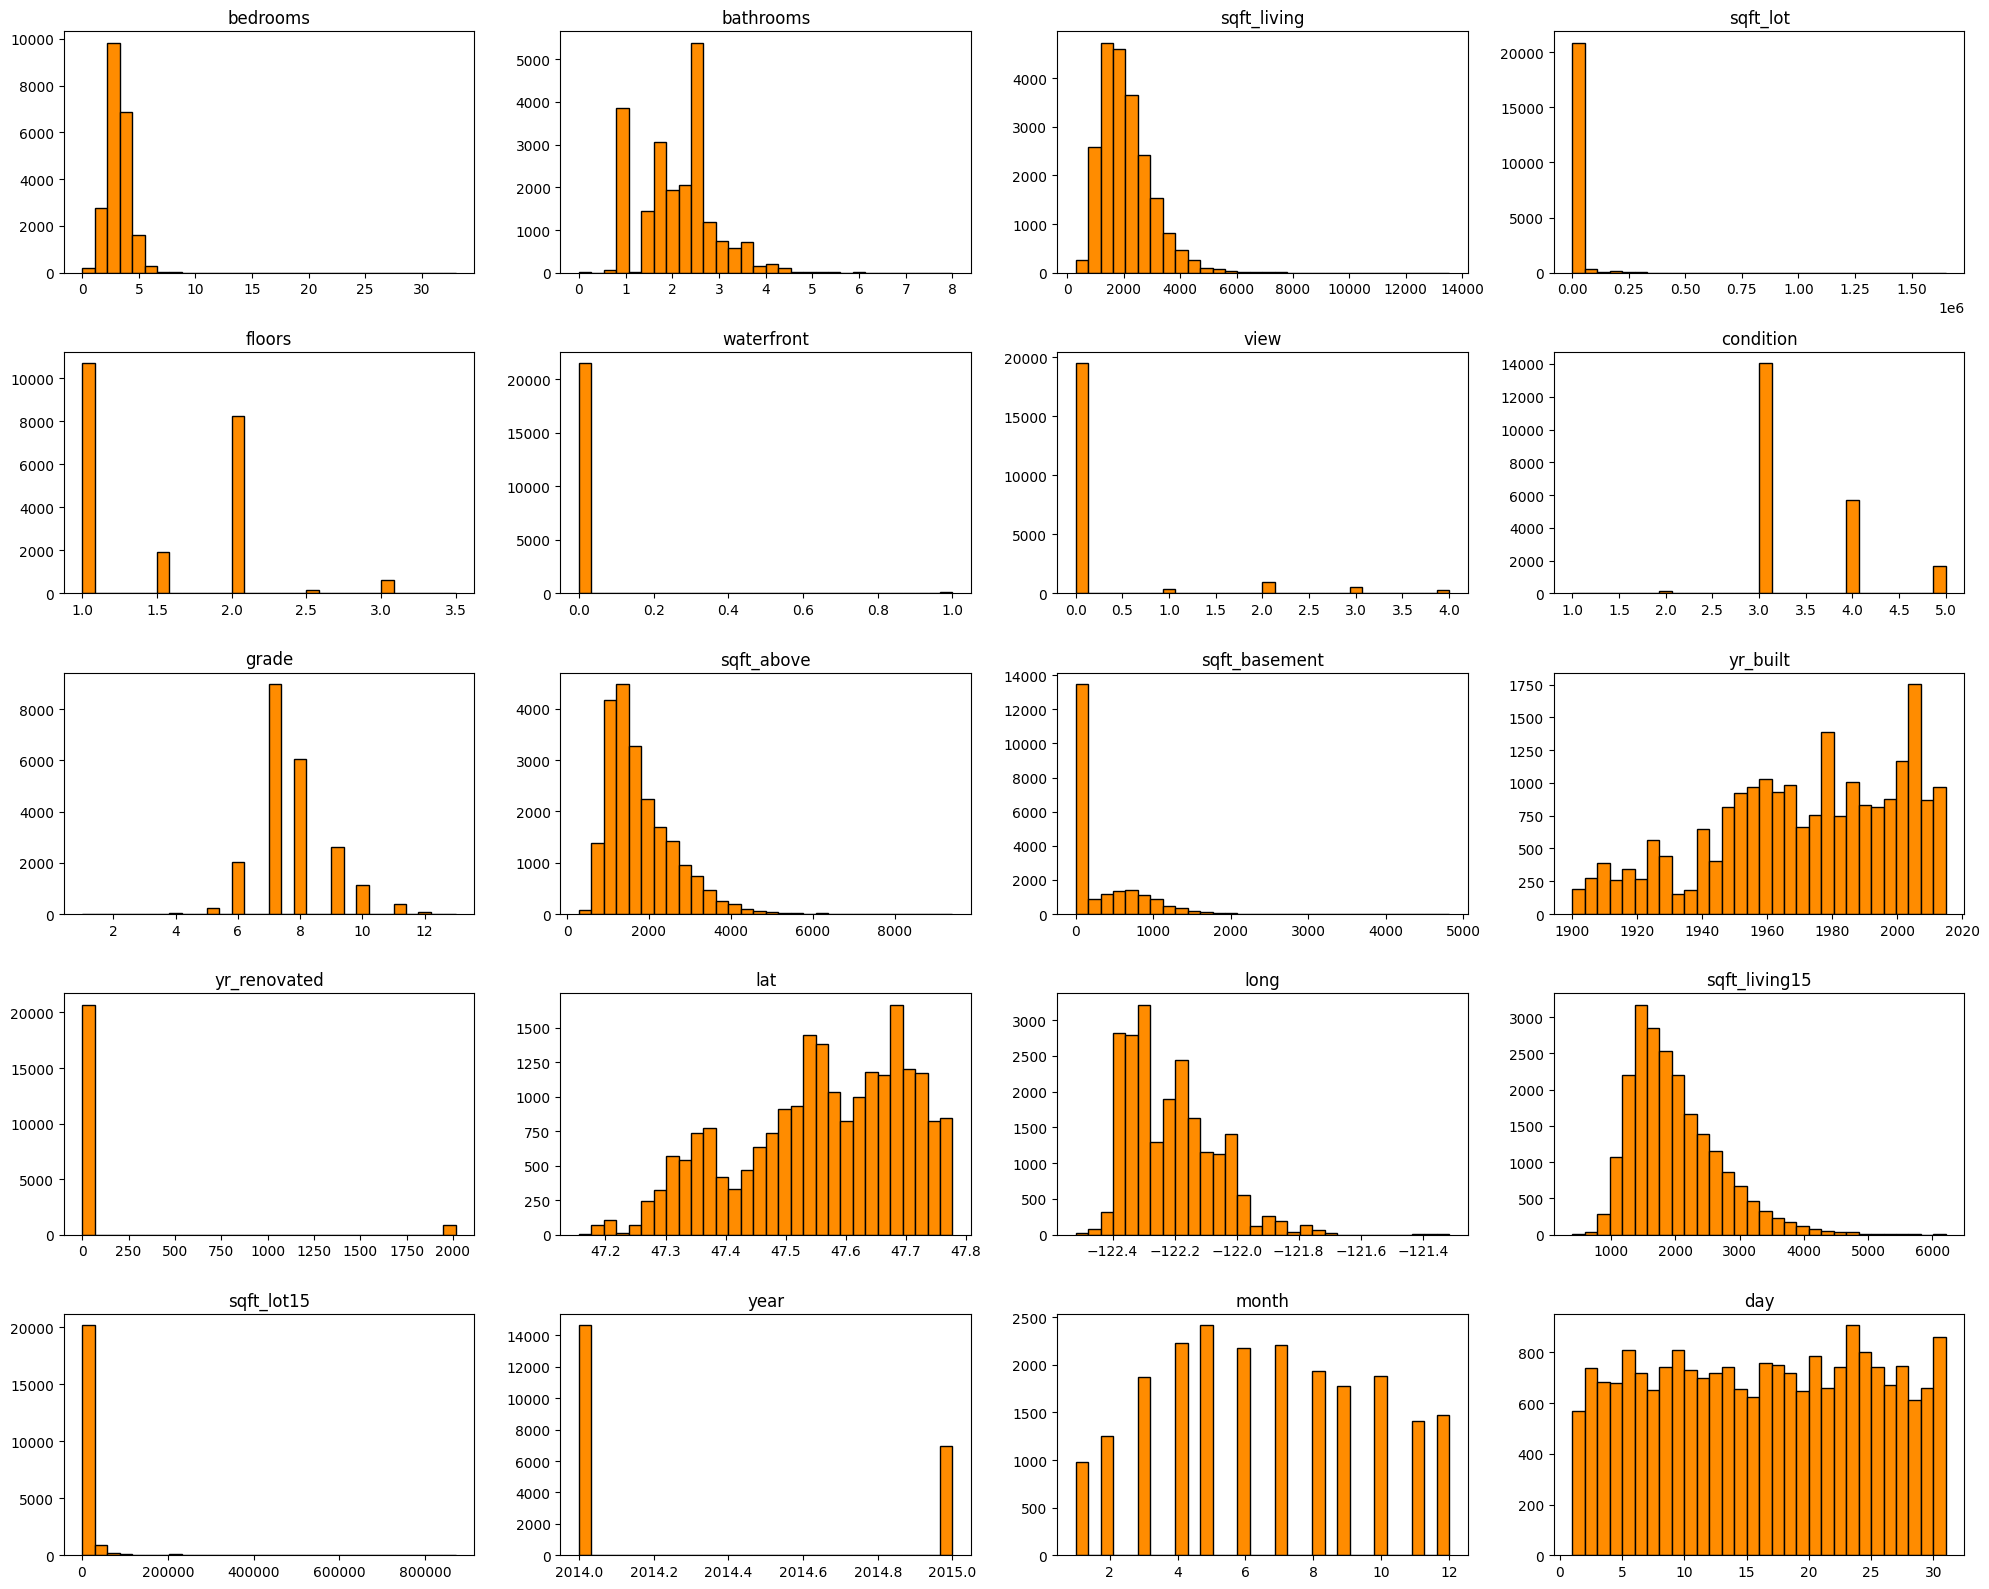

In [18]:
color = '#FF8C00'

# grid size
nrows, ncols = 5, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(df.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(df.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(df.columns[i])

plt.tight_layout()
plt.show()

In [19]:
# looking for correlations with the target
df.corrwith(df["price"]).sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
                   ...   
zip_98002       -0.080300
zip_98168       -0.091665
zip_98001       -0.092179
zip_98042       -0.100370
zip_98023       -0.106093
Length: 91, dtype: float64

In [20]:
# dealing with multicolinearitiy 
num_corr = round(df.corr(), 2)


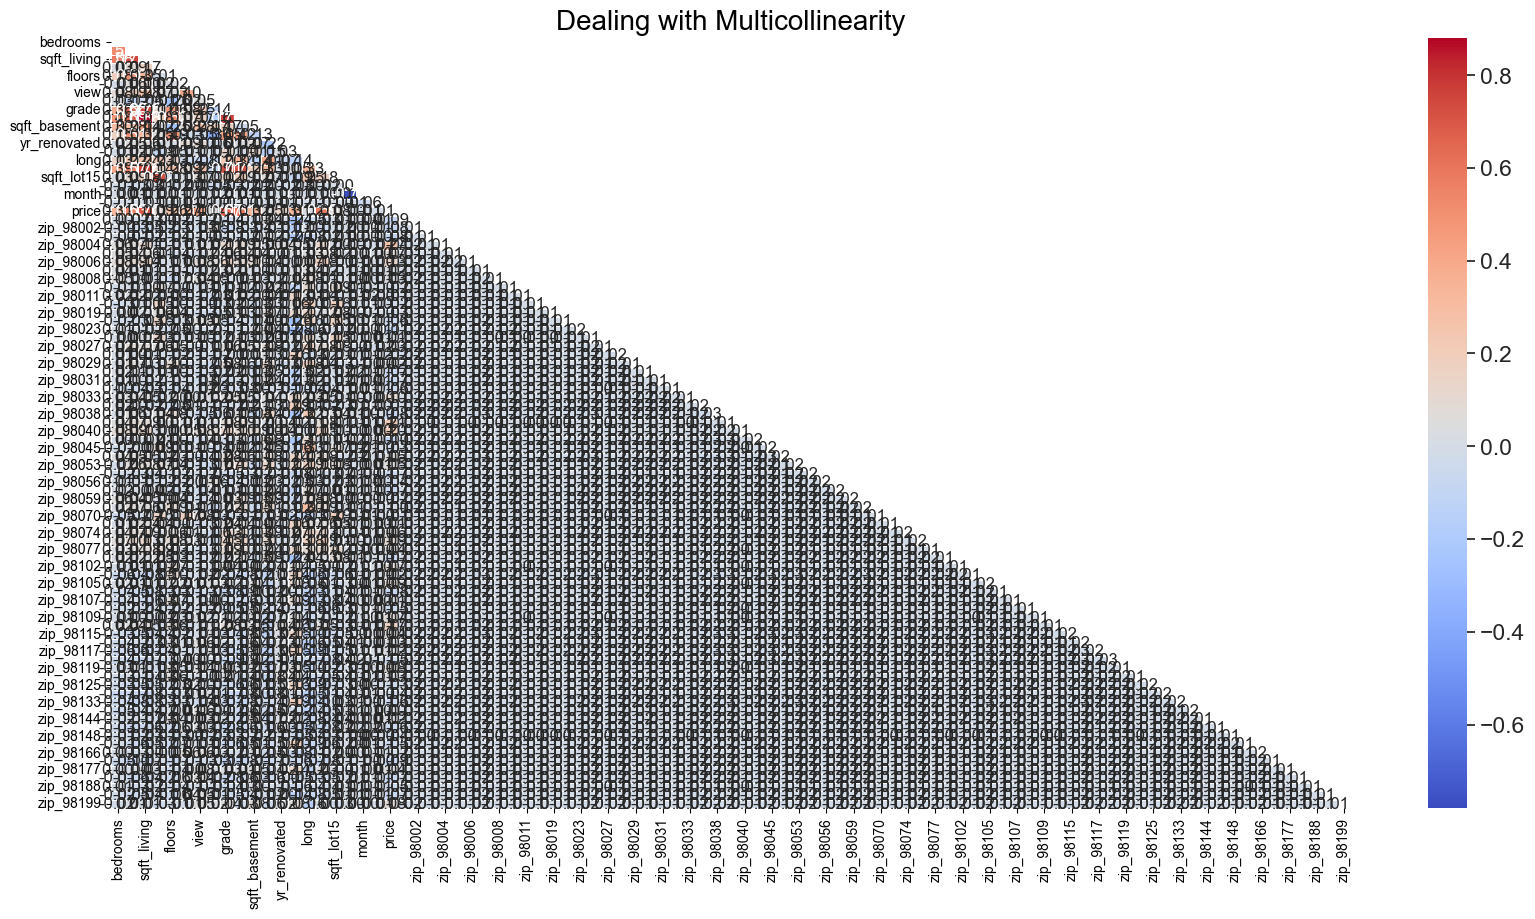

In [21]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

In [22]:
df = df.drop(columns=[ "sqft_above", "sqft_living15", "sqft_lot15", "grade", "bathrooms", "bedrooms", "year", "month", "day" ])

In [23]:
# dealing with multicolinearitiy 
num_corr = round(df.corr(), 2)

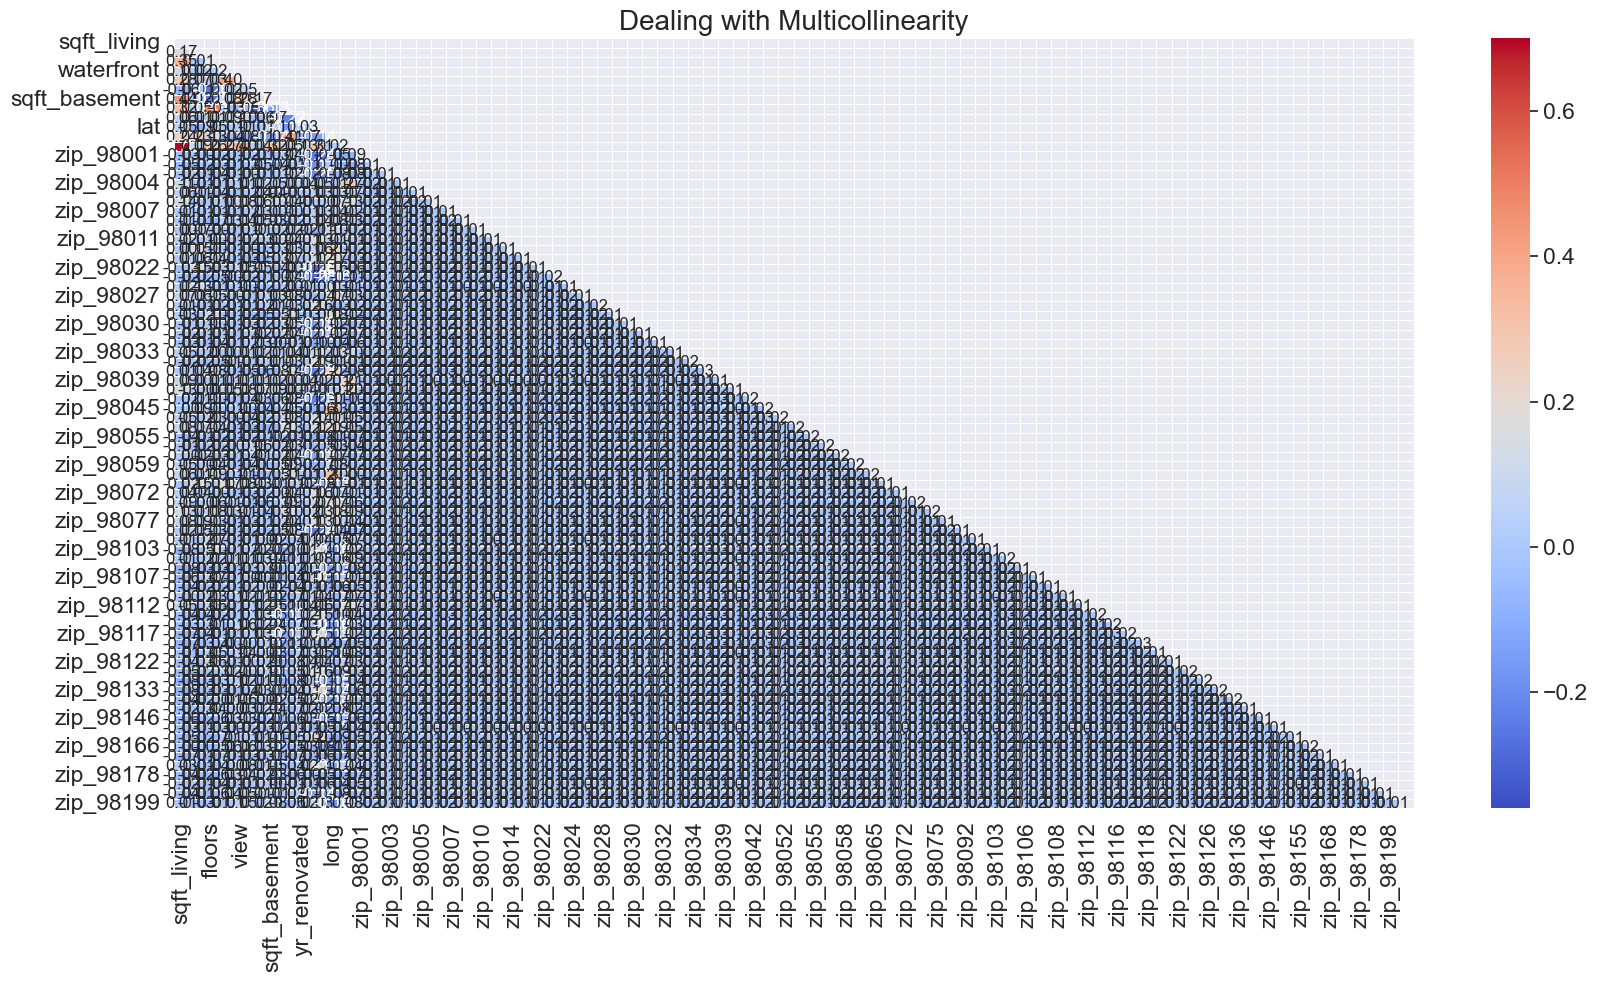

In [24]:
# Correlation Matrix-Heatmap Plot UPDATED
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

### Modeling

In [25]:
#X-y Split
X = df.drop(columns="price")
y = df.price

In [26]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
print(f'100% of our data: {len(df)}.')
print(f'70% for training data: {len(X_train)}.')
print(f'30% for test data: {len(X_test)}.')

100% of our data: 21613.
70% for training data: 17290.
30% for test data: 4323.


In [28]:
model = LinearRegression()

In [29]:
model


LinearRegression()

In [30]:
model.fit(X_train, y_train)

LinearRegression()

In [31]:
predictions = model.predict(X_test)

In [32]:
# Make a dataframe to compare

eval_df = pd.DataFrame({"actual":y_test,"pred":predictions})
eval_df

,actual,pred
735,365000.0,3.686749e+05
2830,865000.0,8.661663e+05
4106,1038000.0,1.209991e+06
16218,1490000.0,1.300954e+06
19964,711000.0,6.824435e+05
...,...,...
13674,338000.0,3.158624e+05
20377,673000.0,7.588090e+05
8805,285000.0,3.942529e+05
10168,605000.0,6.766489e+05


In [33]:
eval_df["dif"] = abs(eval_df["actual"]-eval_df["pred"])
eval_df.head()

,actual,pred,dif
735,365000.0,3.686749e+05,3674.858585
2830,865000.0,8.661663e+05,1166.321290
4106,1038000.0,1.209991e+06,171990.726613
16218,1490000.0,1.300954e+06,189045.797604
19964,711000.0,6.824435e+05,28556.476086


In [34]:
# metrics

r2_3 = r2_score(y_test, predictions)
RMSE_3 = root_mean_squared_error(y_test, predictions)
MAE_3 = mean_absolute_error(y_test, predictions)

In [35]:
#Printing the results
print("R2 = ", round(r2_3, 4))
print("RMSE = ", round(RMSE_3, 4))
print("MAE = ", round(MAE_3, 4))

R2 =  0.7927
RMSE =  177021.2472
MAE =  102551.0275


In [36]:
mean = df["price"].mean()

mean

540088.1417665294

### 06 Improving the Model

#### Ridge Regression

In [37]:
from sklearn.linear_model import Ridge

In [38]:
model = Ridge()

In [39]:
model.fit(X_train, y_train)

Ridge()

In [40]:
predictions_ridge = model.predict(X_test)

#### Model Validation

In [41]:
# metrics

r2_3_2 = r2_score(y_test, predictions)
RMSE_3_2 = root_mean_squared_error(y_test, predictions)
MAE_3_2 = mean_absolute_error(y_test, predictions)


In [42]:
#Printing the results
print("R2 = ", round(r2_3_2, 4))
print("RMSE = ", round(RMSE_3_2, 4))
print("MAE = ", round(MAE_3_2, 4))

R2 =  0.7927
RMSE =  177021.2472
MAE =  102551.0275


#### Lasso Regression

In [43]:
from sklearn.linear_model import Lasso

In [44]:
model = Lasso()

In [45]:
model.fit(X_train, y_train)

c:\Users\nicolas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.319e+14, tolerance: 2.259e+11
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [46]:
predictions_lasso = model.predict(X_test)

#### Model Validation

In [47]:
# Metrics
r2_3_3 = r2_score(y_test, predictions_lasso)
RMSE_3_3 = root_mean_squared_error(y_test, predictions_lasso)
MAE_3_3 = mean_absolute_error(y_test, predictions_lasso)

In [48]:
#Printing the results
print("R2 = ", round(r2_3_3, 4))
print("RMSE = ", round(RMSE_3_3, 4))
print("MAE = ", round(MAE_3_3, 4))

R2 =  0.7927
RMSE =  177022.7949
MAE =  102546.5262


### Decision Tree Regression

In [49]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [50]:
predictions_tree = tree.predict(X_test)

In [51]:
r2_3_4 = r2_score(y_test, predictions_tree)
RMSE_3_4 = root_mean_squared_error(y_test, predictions_tree)
MAE_3_4 = mean_absolute_error(y_test, predictions_tree)

In [52]:
print("R2 = ", round(r2_3_4, 4))
print("RMSE = ", round(RMSE_3_4, 4))
print("MAE = ", round(MAE_3_4, 4))

R2 =  0.686
RMSE =  217869.1951
MAE =  107725.9489


#### KNN Regression

In [53]:
from sklearn.neighbors import KNeighborsRegressor

In [54]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [55]:
predictions_knn = knn.predict(X_test)

In [56]:
r2_3_5 = r2_score(y_test, predictions_knn)
RMSE_3_5 = root_mean_squared_error(y_test, predictions_knn)
MAE_3_5 = mean_absolute_error(y_test, predictions_knn)

In [57]:
print("R2 = ", round(r2_3_5, 4))
print("RMSE = ", round(RMSE_3_5, 4))
print("MAE = ", round(MAE_3_5, 4))

R2 =  0.5191
RMSE =  269626.9813
MAE =  169613.678


### XGBoost 

In [58]:
import xgboost as xgb

In [59]:
xgbr = xgb.XGBRFRegressor()
xgbr.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, feature_weights=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, ...)

In [60]:
predictions_xgb = xgbr.predict(X_test)

In [61]:
r2_3_6 = r2_score(y_test, predictions_xgb)
RMSE_3_6 = root_mean_squared_error(y_test, predictions_xgb)
MAE_3_6 = mean_absolute_error(y_test, predictions_xgb)

### Final Comparison

In [62]:
metrics = {
    'Model': ['Linear Regression', 'Ridge', 'Lasso', 'Decision Tree', 'KNN', 'XGBoost'],
    'R²': [r2_3, r2_3_2, r2_3_3, r2_3_4, r2_3_5, r2_3_6],
    'RMSE': [RMSE_3, RMSE_3_2, RMSE_3_3, RMSE_3_4, RMSE_3_5, RMSE_3_6],
    'MAE': [MAE_3, MAE_3_2, MAE_3_3, MAE_3_4, MAE_3_5, MAE_3_6]
}

In [63]:
df_metrics = pd.DataFrame(metrics)
df_metrics.set_index("Model").T

Model,Linear Regression,Ridge,Lasso,Decision Tree,KNN,XGBoost
R²,0.792716,0.792716,0.792712,0.686017,0.519114,0.787536
RMSE,177021.247241,177021.247241,177022.794904,217869.195107,269626.981289,179219.652098
MAE,102551.027543,102551.027543,102546.526164,107725.948878,169613.677955,103136.940254


##### Screenshot Results Baseline Model
![Alt text](results_baseline_model.jpg)

### Normalization with MinMaxScaler

In [64]:
# color = '#FF8C00'

# # grid size
# nrows, ncols = 5, 4

# fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

# axes = axes.flatten()

# # Plot each numerical feature
# for i, ax in enumerate(axes):
#     if i >= len(df.columns):
#         ax.set_visible(False)
#         continue
#     ax.hist(df.iloc[:, i], bins=30, color=color, edgecolor='black')
#     ax.set_title(df.columns[i])

# plt.tight_layout()
# plt.show()

In [65]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

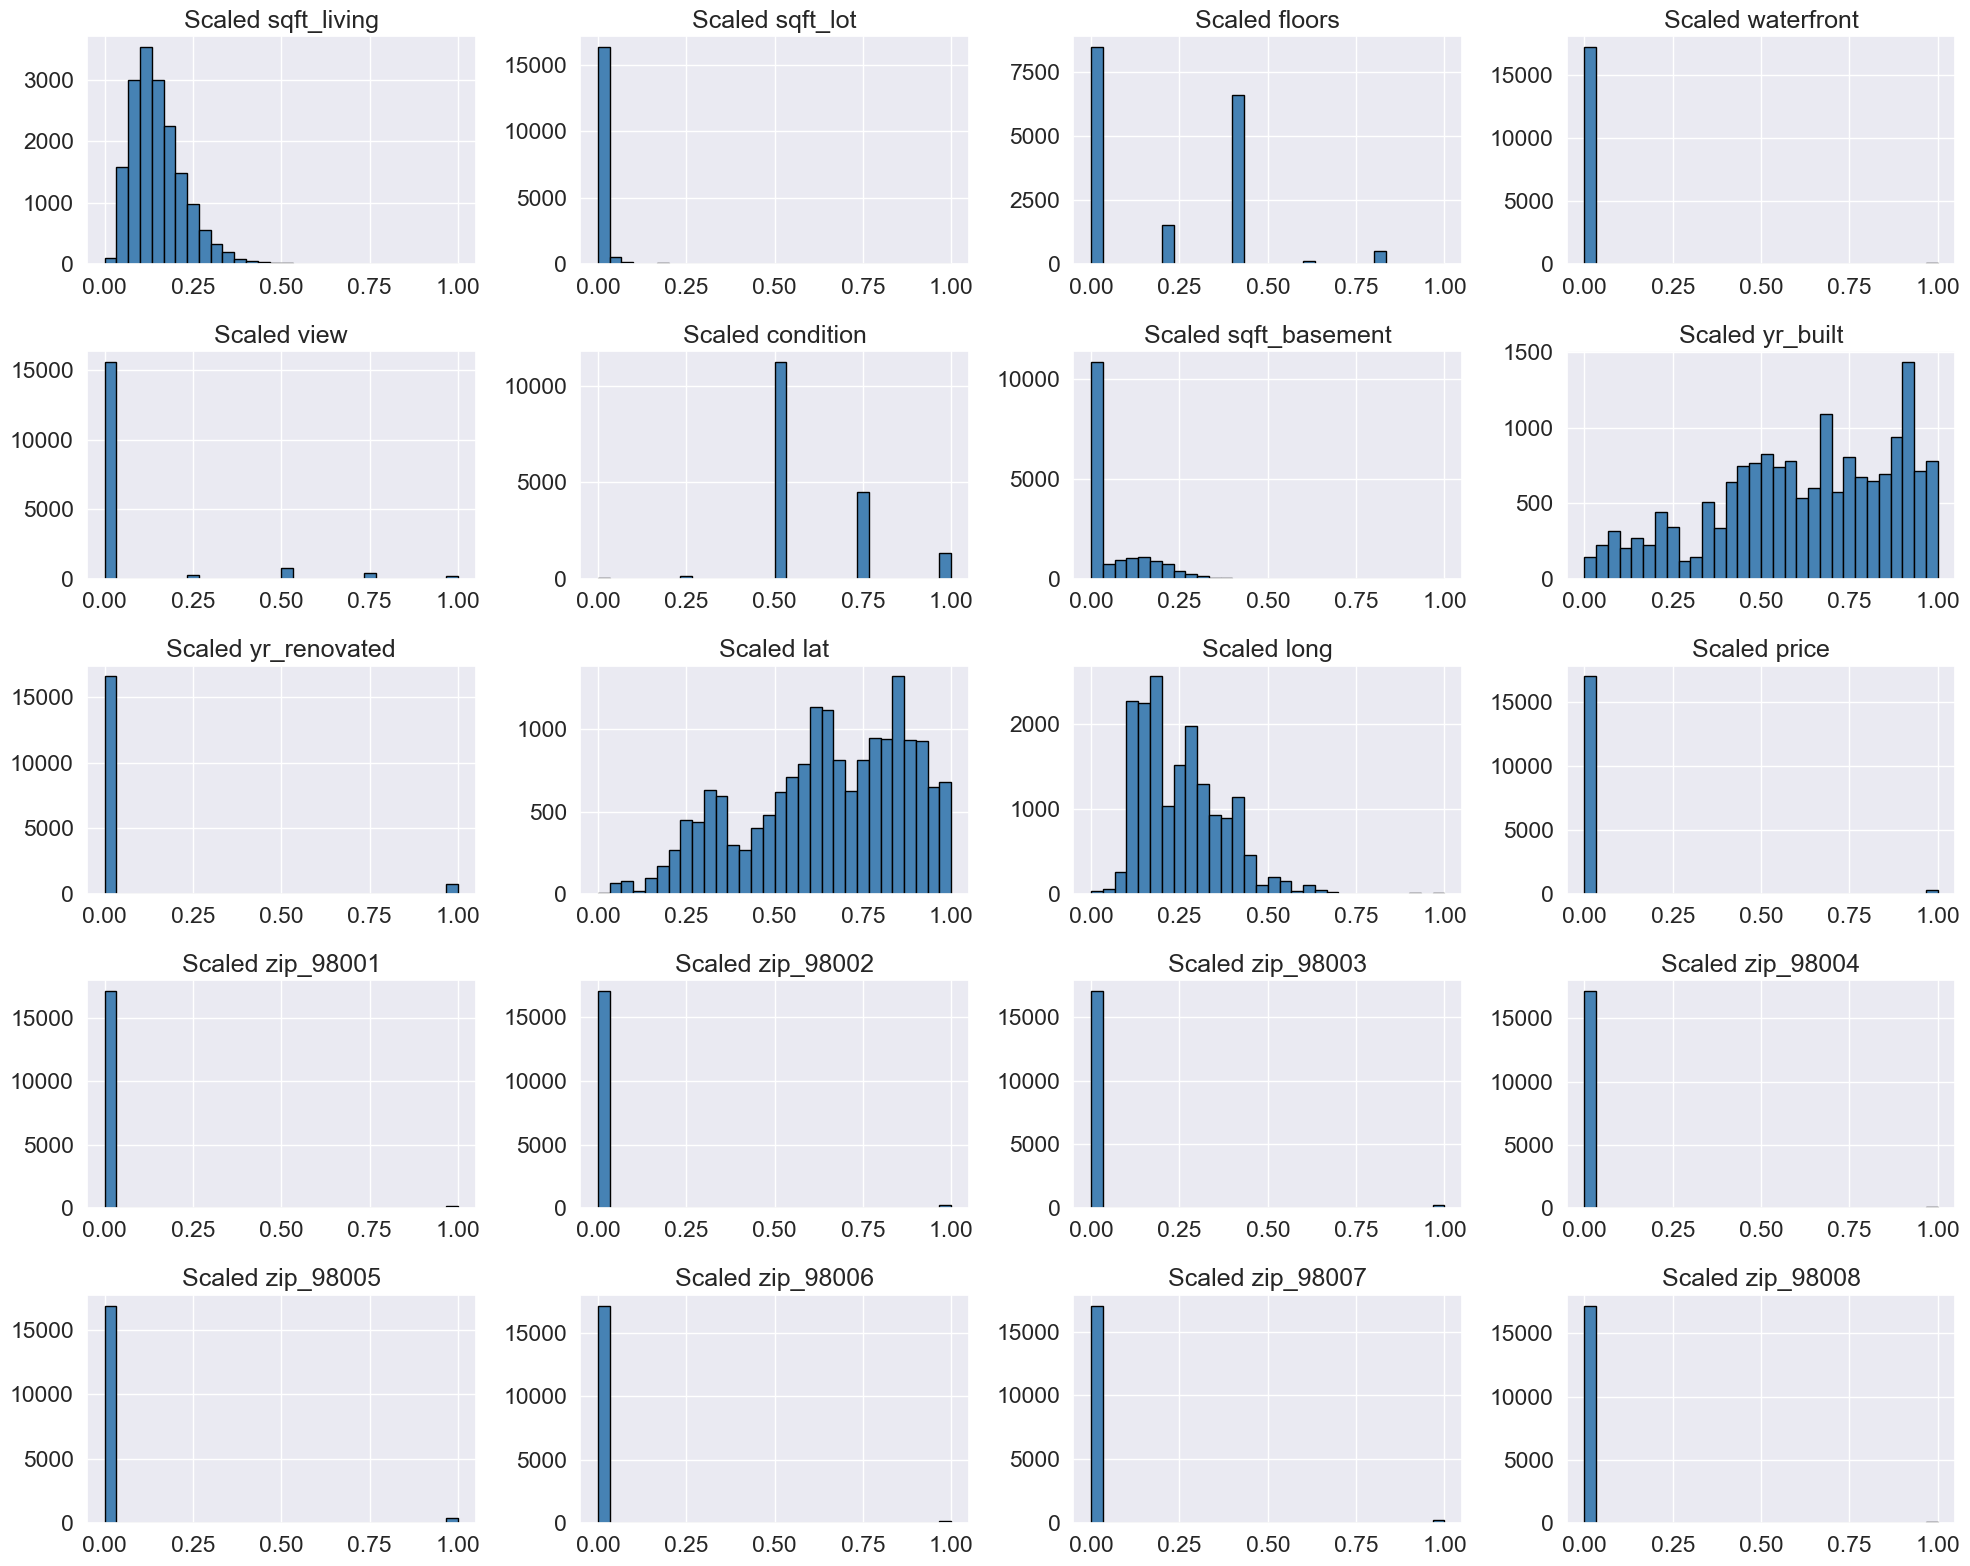

In [66]:
color = '#4682B4'

nrows, ncols = 5, 4

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= X_train_scaled.shape[1]:
        ax.set_visible(False)
        continue
    ax.hist(X_train_scaled[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(f'Scaled {df.columns[i]}')

plt.tight_layout()
plt.show()

In [67]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train_scaled, y_train)

predictions_xgb_2 = xgbr.predict(X_test_scaled)

In [68]:
r2_3_7 = r2_score(y_test, predictions_xgb_2)
RMSE_3_7 = root_mean_squared_error(y_test, predictions_xgb_2)
MAE_3_7 = mean_absolute_error(y_test, predictions_xgb_2)

print("R2 = ", round(r2_3_7, 4))
print("RMSE = ", round(RMSE_3_7, 4))
print("MAE = ", round(MAE_3_7, 4))

R2 =  0.8844
RMSE =  132206.6998
MAE =  71875.9362


### Standardization with StandardScaler

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [71]:
xgbr.fit(X_train_scaled, y_train)
predictions_xgb_2 = xgbr.predict(X_test_scaled)

In [72]:
r2_3_7 = r2_score(y_test, predictions_xgb_2)
RMSE_3_7 = root_mean_squared_error(y_test, predictions_xgb_2)
MAE_3_7 = mean_absolute_error(y_test, predictions_xgb_2)

#Printing the results
print("R2 = ", round(r2_3_7, 4))
print("RMSE = ", round(RMSE_3_7, 4))
print("MAE = ", round(MAE_3_7, 4))

R2 =  0.8844
RMSE =  132206.6998
MAE =  71875.9362


In [73]:
# color = '#FF8C00'

# # grid size
# nrows, ncols = 5, 4  # adjust for your number of features

# fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

# axes = axes.flatten()

# # Plot each numerical feature
# for i, ax in enumerate(axes):
#     if i >= len(df.columns):
#         ax.set_visible(False)  # hide unesed plots
#         continue
#     ax.hist(df.iloc[:, i], bins=30, color=color, edgecolor='black')
#     ax.set_title(df.columns[i])

# plt.tight_layout()
# plt.show()

In [74]:
X_train

,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,lat,long,zip_98001,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
6325,1780,13095,1.0,0,0,4,0,1983,0,47.3670,-122.152,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
13473,1000,3700,1.0,0,0,3,200,1929,0,47.5520,-122.290,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17614,1080,7486,1.5,0,0,3,90,1942,0,47.4838,-122.335,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
16970,2090,7500,1.0,0,0,4,810,1977,0,47.3951,-122.172,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
20868,1741,1439,2.0,0,0,3,295,2007,0,47.7043,-122.209,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,1000,6914,1.0,0,0,3,0,1947,0,47.7144,-122.319,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21575,3087,5002,2.0,0,0,3,0,2014,0,47.2

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Log transform features
X_train_log = np.log1p(X_train) 
X_test_log = np.log1p(X_test)

# Initialize and fit Linear Regression model
lr = LinearRegression()
lr.fit(X_train_log, y_train)

# Predict
predictions_lr = lr.predict(X_test_log)

# Evaluation metrics
r2_lr = r2_score(y_test, predictions_lr)
rmse_lr = mean_squared_error(y_test, predictions_lr, squared=False)  # root MSE
mae_lr = mean_absolute_error(y_test, predictions_lr)

# Print results
print("R2 = ", round(r2_lr, 4))
print("RMSE = ", round(rmse_lr, 4))
print("MAE = ", round(mae_lr, 4))


### Normalization with Log Transform

In [ ]:
X_train_log = np.log1p(X_train) 
X_test_log = np.log1p(X_test)

In [ ]:
xgbr.fit(X_train_log, y_train)
predictions_xgb_2 = xgbr.predict(X_test_log)

In [ ]:
r2_3_7 = r2_score(y_test, predictions_xgb_2)
RMSE_3_7 = root_mean_squared_error(y_test, predictions_xgb_2)
MAE_3_7 = mean_absolute_error(y_test, predictions_xgb_2)

#Printing the results
print("R2 = ", round(r2_3_7, 4))
print("RMSE = ", round(RMSE_3_7, 4))
print("MAE = ", round(MAE_3_7, 4))

### Actual vs Predicted Values

In [ ]:
scatter_color = "#FF6347"
line_color = "#FF8C00"

plt.figure(figsize=(10, 6))

sns.regplot(x='actual', y='pred', data=eval_df,
            scatter_kws={"color": scatter_color, "alpha": 0.7},
            line_kws={"color": line_color, "linewidth": 3})

plt.ylim(bottom=0)
plt.title('Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()